# Sentiment Analysis: Predizendo o Resultado das Eleições Presidenciais dos EUA de 2020 Usando Análise de Sentimento em Dados do Twitter

O objetivo desta análise é coletar *retweets* recentes dos demais usuários a *posts* de Donald Trump e Joe Biden e analisar os sentimentos destas pessoas com relação a eles. Claro que esta não é a maneira mais correta de se tentar predizer o resultado de uma eleição, mas o objetivo é demonstrar técnicas básicas de análise de sentimentos em um exemplo prático, atual e bastante interessante.

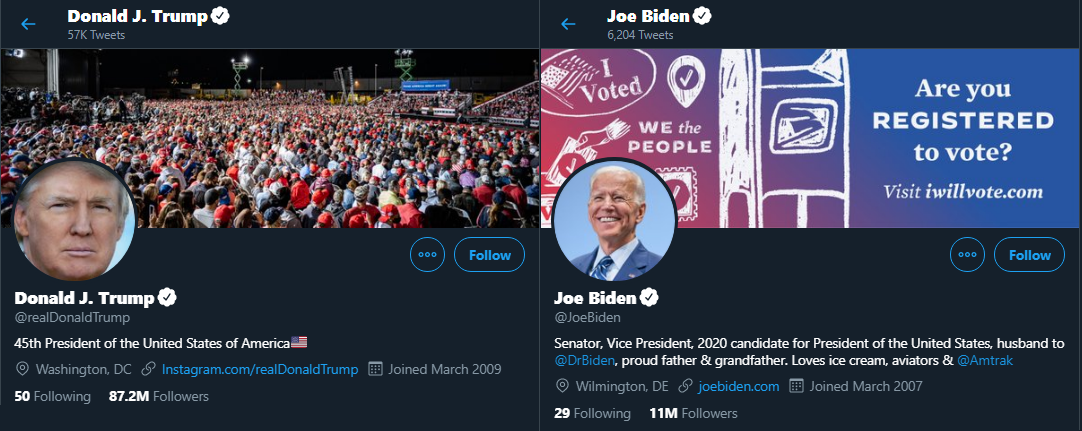

In [1]:
from IPython.display import Image
Image(filename='EUA_2020.png') 

## Coleta dos Dados

Nesta primeira etapa serão extraídos réplicas dos *tweets* dos candidatos através da API do Twitter.

In [84]:
import tweepy
import pandas as pd
import numpy as np
import ssl

consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
access_token="XXXXXXXXXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXXXXXXXXX"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
ssl._create_default_https_context = ssl._create_unverified_context
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

Para a análise serão coletados os *retweets* de postagens recentes dos candidados. É esperado que a reação dos usuários aos *posts* de [Donald Trump](https://twitter.com/realDonaldTrump/) e [Joe Biden](https://twitter.com/JoeBiden/) reflitam a opinião política e opção de voto nas eleições presidenciais.  

3000 *retweets* recentes para cada candidato serão armazenados para a análise.

In [85]:
name = 'realDonaldTrump'

users=[]
tweets=[]
for tweet in tweepy.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(3000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        users.append(tweet.user.screen_name)
        tweets.append(tweet.text.replace('\n', ' '))
        
d = {'users':users, 'text':tweets}

trump = pd.DataFrame(d)
trump.to_csv("trump_retweets0.csv",index=False)

In [86]:
name = 'JoeBiden'

users=[]
tweets=[]
for tweet in tweepy.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(3000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        users.append(tweet.user.screen_name)
        tweets.append(tweet.text.replace('\n', ' '))
        
d = {'users':users, 'text':tweets}

biden = pd.DataFrame(d)
biden.to_csv("biden_retweets0.csv",index=False)

In [87]:
# Dados coletados em 14/10/2020
trump = pd.read_csv("https://raw.githubusercontent.com/luckermos/databases/main/SentimentAnalysis/trump_retweets.csv", encoding = 'utf-8')
trump.head()

,users,text
0,josephgalvan24,@realDonaldTrump How childish and immature can...
1,SurfBot6,@realDonaldTrump The Trump Administration is k...
2,bmayer36412626,@realDonaldTrump Won’t be long
3,warren78882066,@realDonaldTrump Your arguments are thin. Your...
4,JeanetteAmodio,RT @Phillip2020Vote: @realDonaldTrump Message ...


In [94]:
trump['text'][3]

'@realDonaldTrump Your arguments are thin. Your ignorance of reality is shocking. Your double-standards are offensiv… https://t.co/rjUoRVy5G1'

In [89]:
# Dados coletados em 14/10/2020
biden = pd.read_csv("https://raw.githubusercontent.com/luckermos/databases/main/SentimentAnalysis/biden_retweets.csv", encoding = 'utf-8')
biden.head()

,users,text
0,1MDA44,RT @VoteBlueUS: @JoeBiden We are still the cou...
1,Roatyr,@JoeBiden How about packing the courts? Agenda...
2,HayemaJebel,@JoeBiden I'm hope to you Us president!
3,Elya1485,@JoeBiden You can’t even remember you’re runni...
4,_amandaxjo,RT @ScottPresler: @JoeBiden Until we re-elect ...


In [90]:
biden['text'][0]

'RT @VoteBlueUS: @JoeBiden We are still the country that elected Barack Obama. Twice.  The light of our democracy will shine brightly again…'

## Análise dos Dados

Com os dados em mãos, o próximo passo é realizar a análise dos mesmos. Será utilizada a biblioteca [*TextBlob*]  (https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/) que acessa ferramentas de Processamento de Linguagem Natural. Com ela os textos serão resumidos de modo a fornecer índices de sentimentos detectados no texto.

Existem outras bibliotecas disponíveis como *Spacy*, *NLTK* e *gensim* que também oferecem ferramentas para lidar com dados de texto.

In [91]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

In [95]:
text_blob_object1 = TextBlob(trump['text'][3])
print(text_blob_object1.sentiment)

Sentiment(polarity=-0.7, subjectivity=0.925)


In [93]:
text_blob_object2 = TextBlob(biden['text'][0])
print(text_blob_object2.sentiment)

Sentiment(polarity=0.55, subjectivity=0.75)


Aplicando a função `TextBlob` e acessando o objeto *sentiment* obtemos dois valores:  

- Polarity (Polaridade): valores entre -1 e 1 que dizem a intensidade do sentimento positivo (>0) ou negativo (<0) expresso. A polaridade diz respeito a informações concretas do texto.

- Subjectivity (Subjetividade): valores também entre -1 e 1. Entretanto, diz menos respeito a informações concretas e mais a opinião pública.

Em muitos casos, textos possuem polaridade zero porque não foi detectado nenhuma intensidade sentimental. No caso de dados do Twiter, um exemplo são *posts* que contém apenas *links* e *hastags*.

### Polaridade dos Sentimentos

Nesta análise será considerada apenas a polaridade dos sentimentos.  

Primeiramente aplicando o `TextBlob` para os *retweets* de Donald Trump.

In [96]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

trump['Sentiment_Polarity'] = trump['text'].apply(find_pol)
trump.tail()

,users,text,Sentiment_Polarity
2995,mayhapb4,RT @Goss30Goss: @realDonaldTrump You really do...,0.200000
2996,donnaje07071945,"RT @AynRandPaulRyan: @realDonaldTrump Hey, Geo...",0.000000
2997,monger_art,"@realDonaldTrump Even when he's right, he's st...",-0.107143
2998,Vicki45424407,RT @okkie48: @realDonaldTrump https://t.co/wil...,0.000000
2999,Shadow_Ferret,@realDonaldTrump Tell that to turkey-neck. He'...,0.000000


In [97]:
trump['Expression Label'] = np.where(trump['Sentiment_Polarity']>0,'Positive', 'Negative')
trump['Expression Label'][trump.Sentiment_Polarity ==0] = "Neutral"
trump.tail()

C:\Users\lucke\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,users,text,Sentiment_Polarity,Expression Label
2995,mayhapb4,RT @Goss30Goss: @realDonaldTrump You really do...,0.200000,Positive
2996,donnaje07071945,"RT @AynRandPaulRyan: @realDonaldTrump Hey, Geo...",0.000000,Neutral
2997,monger_art,"@realDonaldTrump Even when he's right, he's st...",-0.107143,Negative
2998,Vicki45424407,RT @okkie48: @realDonaldTrump https://t.co/wil...,0.000000,Neutral
2999,Shadow_Ferret,@realDonaldTrump Tell that to turkey-neck. He'...,0.000000,Neutral


É possível analisar os *retweets* mais negativos para Trump.

In [110]:
trump.sort_values('Sentiment_Polarity', ascending=True).head()

,users,text,Sentiment_Polarity,Expression Label,Candidato
547,u561910,@realDonaldTrump WORST PRESIDENT EVER! https:/...,-1.0,Negative,Trump
315,EverydayAmazed,@realDonaldTrump Trumpcare is called the Grim ...,-1.0,Negative,Trump
2558,TheDanLovingood,RT @Out5p0ken: @realDonaldTrump Trump is liter...,-1.0,Negative,Trump
2752,Stoneology101,@realDonaldTrump Your do nothing DOJ and FBI a...,-1.0,Negative,Trump
2882,JohnGledhill15,@realDonaldTrump You never served. Daddies mon...,-1.0,Negative,Trump


Assim como os mais positivos.

In [111]:
trump.sort_values('Sentiment_Polarity', ascending=False).head()

,users,text,Sentiment_Polarity,Expression Label,Candidato
906,chrisjune18,@realDonaldTrump Lol! “Will be”? When is that?...,1.0,Positive,Trump
456,BahramSasani,"@realDonaldTrump Viva Mr. President Trump, you...",1.0,Positive,Trump
2560,Pacoluismonta9a,RT @Pacoluismonta9a: @realDonaldTrump @FLOTUS ...,1.0,Positive,Trump
2551,BahramSasani,"@realDonaldTrump Viva Mr. President Trump, you...",1.0,Positive,Trump
519,Nmadams9,@realDonaldTrump You just kissed goodbye to al...,1.0,Positive,Trump


E, agora, para os *retweets* de Joe Biden é aplicado o `TextBlob`.

In [98]:
biden['Sentiment_Polarity'] = biden['text'].apply(find_pol)
biden.tail()

,users,text,Sentiment_Polarity
2995,rebecka_sharpe,RT @ScottPresler: @JoeBiden Until we re-elect ...,0.0
2996,NicolasEftaxias,@JoeBiden Let’s win !!!! 💙💙💙💙💙,1.0
2997,svijayam,@JoeBiden https://t.co/v4ojdojGUH,0.0
2998,SledgeH03506271,@JoeBiden Cmon man! Let’s face reality here! O...,0.0
2999,angelique_joi,@JoeBiden I Believe you Can! And you Will! Joe...,0.0


In [99]:
biden['Expression Label'] = np.where(biden['Sentiment_Polarity']>0,'Positive', 'Negative')
biden['Expression Label'][biden.Sentiment_Polarity ==0] = "Neutral"
biden.tail()

C:\Users\lucke\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,users,text,Sentiment_Polarity,Expression Label
2995,rebecka_sharpe,RT @ScottPresler: @JoeBiden Until we re-elect ...,0.0,Neutral
2996,NicolasEftaxias,@JoeBiden Let’s win !!!! 💙💙💙💙💙,1.0,Positive
2997,svijayam,@JoeBiden https://t.co/v4ojdojGUH,0.0,Neutral
2998,SledgeH03506271,@JoeBiden Cmon man! Let’s face reality here! O...,0.0,Neutral
2999,angelique_joi,@JoeBiden I Believe you Can! And you Will! Joe...,0.0,Neutral


Para Biden também temos os *retweets* mais negativos.

In [112]:
biden.sort_values('Sentiment_Polarity', ascending=True).head()

,users,text,Sentiment_Polarity,Expression Label,Candidato
2011,EagleLanded2020,"@JoeBiden It’s crap Joe, always was, needs to ...",-1.0,Negative,Biden
2830,ghostof_tom,@JoeBiden I wouldn't build my house on a coll...,-1.0,Negative,Biden
2198,cmckinley411,@JoeBiden ABA is AWFUL!!!! It should have been...,-1.0,Negative,Biden
1620,sandie17,@JoeBiden There’s nothing there. It’s awful.,-1.0,Negative,Biden
725,icard1970,@JoeBiden Come on man! Dirty liar Joe!! Sold o...,-1.0,Negative,Biden


E os mais positivos.

In [113]:
biden.sort_values('Sentiment_Polarity', ascending=False).head()

,users,text,Sentiment_Polarity,Expression Label,Candidato
630,bajenlandet,@JoeBiden You win!,1.0,Positive,Biden
2672,javalyzer,@JoeBiden Best of luck on your senate run!,1.0,Positive,Biden
2506,Tami9876,@JoeBiden It felt great voting for you this mo...,1.0,Positive,Biden
346,montoya815,@JoeBiden Make Virginia great again Joe!!,1.0,Positive,Biden
1469,Freedom19006201,@JoeBiden You're gonna win your Senate seat Jo...,1.0,Positive,Biden


Aplicado a função, analisaremos os sentimentos obtidos comparando os dois candidatos.

In [100]:
trump['Candidato'] = 'Trump'
biden['Candidato'] = 'Biden'

candidates = pd.concat([trump,biden])

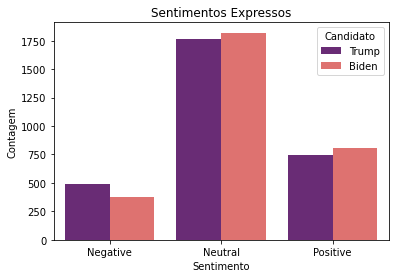

In [101]:
sns.countplot(x = 'Expression Label', hue='Candidato', data = candidates, palette = 'magma').set(xlabel='Sentimento', ylabel='Contagem')
plt.title('Sentimentos Expressos')
plt.show()

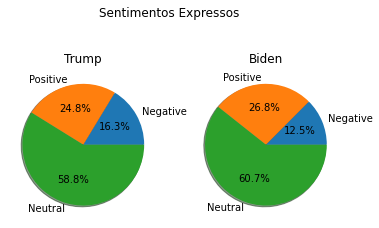

In [102]:
trump_counts = trump.groupby('Expression Label').count()

source_labels = trump_counts.Sentiment_Polarity.sort_values().index
source_counts = trump_counts.Sentiment_Polarity.sort_values()

biden_counts = biden.groupby('Expression Label').count()

source_labels1 = biden_counts.Sentiment_Polarity.sort_values().index
source_counts1 = biden_counts.Sentiment_Polarity.sort_values()

fig, axs = plt.subplots(1,2)
fig.suptitle('Sentimentos Expressos')
axs[0].pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True)
axs[0].set_title("Trump")
axs[1].pie(source_counts1, labels=source_labels1, autopct='%1.1f%%', shadow=True)
axs[1].set_title("Biden")
plt.show()

Como os elementos associados a sentimentos neutros não contribuem em nada para a análise, eles serão removidos.

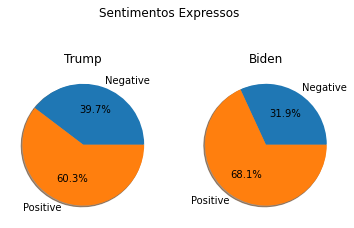

In [103]:
trump_counts = trump[trump['Expression Label']!="Neutral"].groupby('Expression Label').count()

source_labels = trump_counts.Sentiment_Polarity.sort_values().index
source_counts = trump_counts.Sentiment_Polarity.sort_values()

biden_counts = biden[biden['Expression Label']!="Neutral"].groupby('Expression Label').count()

source_labels1 = biden_counts.Sentiment_Polarity.sort_values().index
source_counts1 = biden_counts.Sentiment_Polarity.sort_values()

fig, axs = plt.subplots(1,2)
fig.suptitle('Sentimentos Expressos')
axs[0].pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True)
axs[0].set_title("Trump")
axs[1].pie(source_counts1, labels=source_labels1, autopct='%1.1f%%', shadow=True)
axs[1].set_title("Biden")
plt.show()

Vemos, então, que dentre os *retweets* (desconsiderando os neutros) o candidato Biden leva vantagem por ter 68,1% de respostas positivas, enquanto seu adversário, Trump, tem apenas 60,3%.

C:\Users\lucke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\lucke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



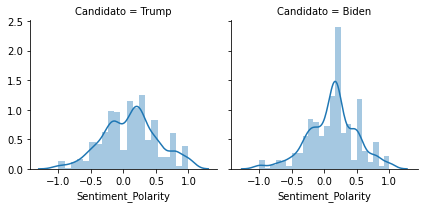

In [104]:
sns.FacetGrid(candidates[candidates['Expression Label']!="Neutral"], col="Candidato").map(sns.distplot, 'Sentiment_Polarity')

C:\Users\lucke\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



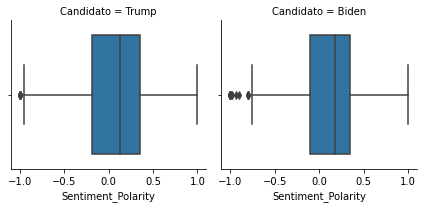

In [105]:
sns.FacetGrid(candidates[candidates['Expression Label']!="Neutral"], col="Candidato").map(sns.boxplot, 'Sentiment_Polarity')

In [106]:
candidates[candidates['Expression Label']!="Neutral"].groupby('Candidato').mean()

,Sentiment_Polarity
Candidato,
Biden,0.124754
Trump,0.109592


Além disso, é possível ver que a mediana e a média das polaridades dos *retweets* de Biden são razoavelmente maiores que as de Trump.  
Talvez o fato de Donald Trump ser o atual presidente e ter uma quantidade consideravelmente maior de seguidores possa o ter colocado em maior evidência para críticas, entretanto, fato é que aqueles que interagem com o candidato Biden apresentam, em geral, mais incentivo e apoio com relação à Trump.  
Estaria, então, Joe Biden um passo a frente de Trump na corrida eleitoral?!